In [2]:
import re
import numpy as np
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF,DCD  # test trajectory
import numpy.linalg
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf
#from MDAnalysis.tests.datafiles import RANDOM_WALK_TOPO, RANDOM_WALK
import matplotlib.pyplot as plt

In [3]:
np_t=[['1.5','10000','r'],['1','50000','b'], ['0.9','150000','c'],['0.8','150000','g'],['0.7','180000','y'],['0.65','350000','m'],
      ['0.6','1000000','pink'],['0.55','3000000','tan'],['0.5','10000000','grey'], ['0.475','30000000','indigo'], ['0.45','100000000','k']]

In [18]:
ls_rdf1=[]
ls_rdf2=[]
ls_rdf3=[]
for i in np_t:
    top_path = "./n360/equil/kalj_T"+i[0]+"_n360_v300_"+i[1]+"_1.lammpstrj"
    traj_path = "./n360/prod/kalj_T"+i[0]+"_n360_v300_prod_"+i[1]+"_1.unwrap.dcd"
    u = mda.Universe(top_path, traj_path, topology_format='LAMMPSDUMP')
    sel1 = u.select_atoms("type 1")
    sel2 = u.select_atoms("type 2")
    # compute rdf
    rdf1 = rdf.InterRDF(sel1, sel1, nbins=100, range=(0, 10))
    rdf2 = rdf.InterRDF(sel2, sel2, nbins=100, range=(0, 10))
    rdf3 = rdf.InterRDF(sel1, sel2, nbins=100, range=(0, 10))
    rdf1.run()
    rdf2.run()
    rdf3.run()
    ls_rdf1.append(rdf1)
    ls_rdf2.append(rdf2)
    ls_rdf3.append(rdf3)

C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please 

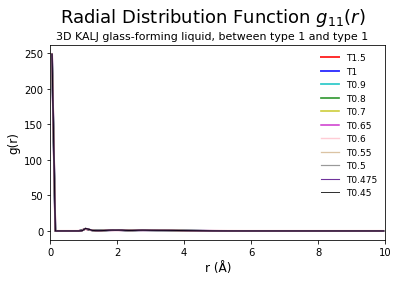

In [20]:
# figure 1 - RDFs
fig = plt.figure(1)

# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)


# plot RDFs
for j in range(len(ls_rdf1)):
    plt.plot(ls_rdf1[j].bins, ls_rdf1[j].rdf, np_t[j][2], linewidth=linewidths[j], label='T'+np_t[j][0], alpha=0.8)
    
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function "+r"$g_{11}(r)$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, between type 1 and type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = './fig1.[3D_KALJ]_RDF_type1_type1.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')

C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please 

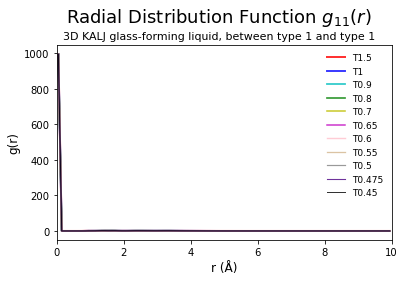

In [21]:
# figure 2 - RDFs
fig = plt.figure(2)

# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)


# plot RDFs
for j in range(len(ls_rdf2)):
    plt.plot(ls_rdf2[j].bins, ls_rdf2[j].rdf, np_t[j][2], linewidth=linewidths[j], label='T'+np_t[j][0], alpha=0.8)
    
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function "+r"$g_{11}(r)$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, between type 1 and type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = './fig2.[3D_KALJ]_RDF_type2_type2.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')

C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please 

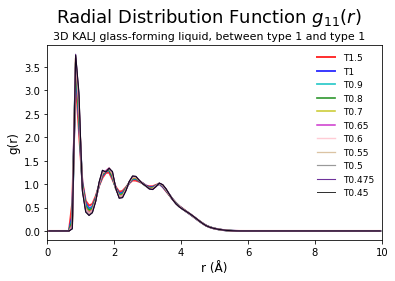

In [22]:
# figure 3 - RDFs
fig = plt.figure(3)

# set 11 line width, range from 2 to 1
linewidths = np.linspace(2, 1, 11)


# plot RDFs
for j in range(len(ls_rdf3)):
    plt.plot(ls_rdf3[j].bins, ls_rdf3[j].rdf, np_t[j][2], linewidth=linewidths[j], label='T'+np_t[j][0], alpha=0.8)
    
plt.xlabel('r (Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.xlim(0, 10)

# two lines of title
plt.text(x=0.5, y=0.88, s="Radial Distribution Function "+r"$g_{11}(r)$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, between type 1 and type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = './fig3.[3D_KALJ]_RDF_type1_type2.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')

C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
C:\Users\22715\anaconda3\lib\site-packages\MDAnalysis\topology\LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses t

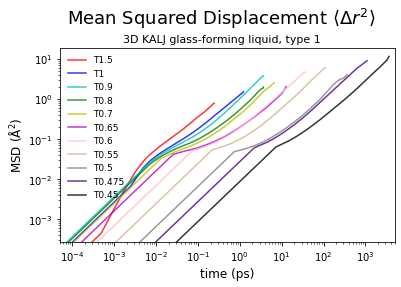

In [6]:
# figure 4 - MSDs
all_msd=[]
fig = plt.figure(4)

for i in np_t:
    top_path = "./n360/equil/kalj_T"+i[0]+"_n360_v300_"+i[1]+"_1.lammpstrj"
    traj_path = "./n360/prod/kalj_T"+i[0]+"_n360_v300_prod_"+i[1]+"_1.unwrap.dcd"
    u = mda.Universe(top_path, traj_path, topology_format='LAMMPSDUMP')
    msds= msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=False)
    msds.run()
    plt.loglog(msds.times, msds.results.timeseries, i[2], label='T'+i[0], alpha=0.8)
    all_msd.append(msds)
plt.xlabel('time (ps)', fontsize=12)
plt.ylabel('MSD (Å$^2$)', fontsize=12)
plt.legend(loc='upper left', fontsize=9, frameon=False)
plt.xlim(0.00005, 5000)

# two lines of title
plt.text(x=0.5, y=0.88, s="Mean Squared Displacement "+r"$\langle \Delta r^2 \rangle$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = './fig4.[3D_KALJ]_MSD_type1.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')

In [21]:
print(all_msd[0].results.timeseries)
print(len(all_msd[0].results.timeseries))

[0.00000000e+00 4.43974243e-04 1.74191248e-03 3.79833416e-03
 6.47331125e-03 9.60431147e-03 1.30272322e-02 1.65929868e-02
 2.01784154e-02 2.36916859e-02 2.70729982e-02 3.02916042e-02
 3.33403603e-02 3.62291123e-02 3.89780486e-02 4.16118489e-02
 4.41551123e-02 4.66292199e-02 4.90505669e-02 5.14299917e-02
 5.37731636e-02 5.60816627e-02 5.83544009e-02 6.05890084e-02
 6.27830176e-02 6.49347612e-02 6.70438008e-02 6.91108634e-02
 7.11377154e-02 7.31270417e-02 7.50821611e-02 7.70065637e-02
 7.89034565e-02 8.07754786e-02 8.26245916e-02 8.44521303e-02
 8.62589872e-02 8.80459274e-02 8.98139465e-02 9.15644515e-02
 9.32993357e-02 9.50209806e-02 9.67320098e-02 9.84348440e-02
 1.00131392e-01 1.01823017e-01 1.03510591e-01 1.05194437e-01
 1.06874231e-01 1.08549053e-01 1.10217708e-01 1.11879100e-01
 1.13532365e-01 1.15176797e-01 1.16811945e-01 1.18438012e-01
 1.20056011e-01 1.21667415e-01 1.23273715e-01 1.24876267e-01
 1.26476483e-01 1.28075956e-01 1.29676303e-01 1.31278935e-01
 1.32884931e-01 1.344949

In [ ]:
print(all_msd[1].results.timeseries)
print(len(all_msd[1].results.timeseries))

In [22]:
def first1(x):
    for i in range(len(x)):
        if float(x[i])< 1:
            i+=1
        else:
            break
    return i
    

In [29]:
diffusion_times = []
# loop over all temperatures
i=1
for j in all_msd:
    # try find the index of the first time where MSD > 1
    index = first1(j.results.timeseries ) 
    #print(index)
    # append the diffusion time to the list
    if index < 501:
        diffusion_times.append(index)
    i+=1

In [30]:
print(diffusion_times)

[317, 136, 261, 189, 289, 92, 82, 116, 47, 46]


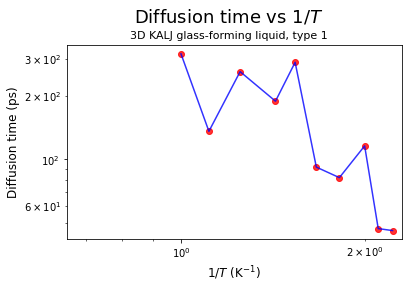

In [32]:
# figure 5 - diffusion times vs 1/T
temp=[1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475,0.45]
fig = plt.figure(5)

# plot diffusion times vs 1/T
plt.loglog(1/np.array(temp, dtype=float), diffusion_times,'o', color='r', alpha=0.8)
plt.loglog(1/np.array(temp, dtype=float), diffusion_times, color='b', alpha=0.8)
plt.xlabel(r'$1/T$ (K$^{-1}$)', fontsize=12)
plt.ylabel('Diffusion time (ps)', fontsize=12)
plt.xlim(0.65, 2.3)

# two lines of title
plt.text(x=0.5, y=0.88, s="Diffusion time vs "+r"$1/T$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "3D KALJ glass-forming liquid, type 1", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = './fig5.[3D_KALJ]_diffusion_time_vs_1_over_T_type1.png'
plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')